# Find Model Grid Point
Done originally to help Stephanie Lngard download ERRDAP Data

In [1]:
import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
with nc.Dataset('/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc') as mesh:
    tmask=np.copy(mesh.variables['tmask'][0,:,:,:])
    navlat=np.copy(mesh.variables['nav_lat'][:,:])
    navlon=np.copy(mesh.variables['nav_lon'][:,:])
    e3t_0=np.copy(mesh.variables['e3t_0'][0,:,:,:])
    gdepw=np.copy(mesh.variables['gdepw_0'][0,:,:,:])
    print(mesh.variables.keys())

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


In [20]:
obslon=-123.173093
obslat=49.692583
j,i=geo_tools.find_closest_model_point(obslon,obslat,navlon,navlat)
print('x= '+str(i)+'\ny= '+str(j))

x= 386
y= 533


In [21]:
# if this prints all zeros then the data point is on land
[(x,y) for (x,y) in enumerate(tmask[:,j,i])]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 0),
 (26, 0),
 (27, 0),
 (28, 0),
 (29, 0),
 (30, 0),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 0),
 (37, 0),
 (38, 0),
 (39, 0)]

In [23]:
gdepw[3, j, i]

3.0000193

In [24]:
# Define paths
paths = {
    'coords': '/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc',
    'mask': '/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc',
    'out': './results',
}

In [25]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

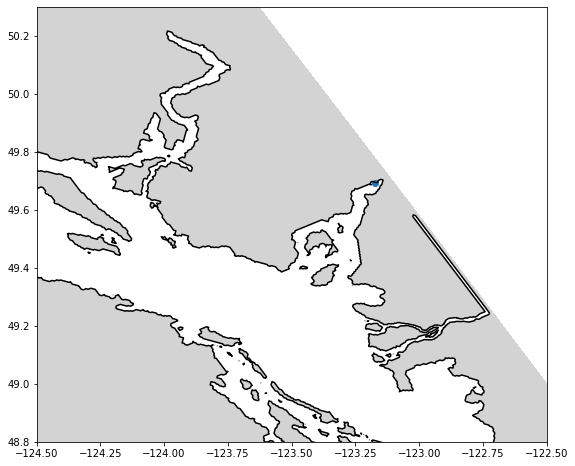

In [26]:
#plot with lat and lon
fig, ax = plt.subplots(figsize=(19, 8))
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([-124.5, -122.5])
ax.set_ylim([48.8, 50.3])
ax.set_aspect(5/4.4)
plt.scatter(obslon, obslat)

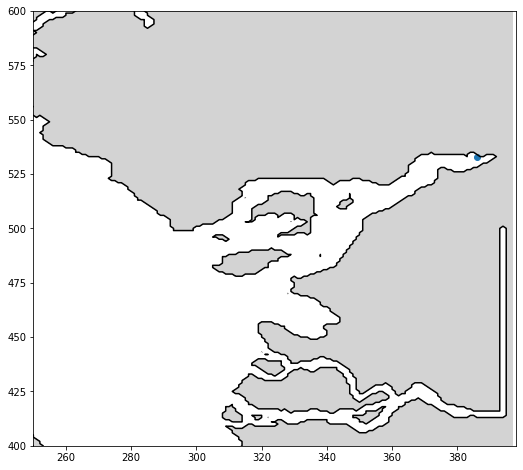

In [28]:
# plot with grid points
fig, ax = plt.subplots(figsize=(19, 8))
ax.contourf(mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([250, 398])
ax.set_ylim([400, 600])
ax.set_aspect(4/6)
nmin, nmax = 0, -1
plt.scatter(i, j)